In [90]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf

In [2]:
data = pd.read_csv('mental Health Questionnaire 2.0.csv')


In [3]:
data

,Timestamp,Email address,Name,Gender,Are you above 30 years of age?,Employment Status,City,How are you feeling today?,eating and sleeping,(If sad)have you been in the same mental state for the past few days?,...,"Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?",Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?,"How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?","If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",Has the COVID-19 pandemic affected your mental well being?,How often do you get offended or angry or start crying ?,How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction,Prediction_status
0,09-12-2021 23:54,riyaaditi2@gmail.com,Aditi Harsh,Female,No,Student,Tier 3 (Other cities/towns),Fine,Yes,No,...,No,No,NaN,NaN,NaN,NaN,NaN,NaN,36,Yes
1,10-12-2021 08:40,imcrazyashutosh@gmail.com,Ashutosh Kumar,Male,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Fine,No,Yes,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,33,No
2,10-12-2021 21:48,atharv23srivastava@gmail.com,Atharv srivastava,Male,No,Student,"Tier 1 (Delhi, Mumbai, Bangalore, Chennai, Kol...",Fine,No,Maybe,...,Maybe,Maybe,More than 10 hours,1.0,Yes,Sometimes,2.0,NaN,34,No
3,10-12-2021 21:50,ritulricha22@gmail.com,Rimi,Female,No,Student,Tier 3 (Other cities/towns),Fine,No,Maybe,...,Yes,Yes,2-5 hours,1.0,Yes,Often,4.0,NaN,35,Yes
4,10-12-2021 21:55,nisha18054@gmail.com,Jaya singh,Female,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Good,Yes,No,...,No,No,5-10 hours,1.0,Not sure,Sometimes,4.0,NaN,33,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,15-12-2021 13:18,shwetank1921@gmail.com,Kumar shwetank,Male,Yes,Unemployed,Tier 2 (Capital cities Eg. Lucknow ),Good,Yes,No,...,Yes,Yes,2-5 hours,4.0,Yes,Sometimes,4.0,4.0,43,Yes
154,15-12-2021 15:17,shukla.anu23@gmail.com,Anurag Shukla,Male,Yes,Employed,Tier 2 (Capital cities Eg. Lucknow ),Good,Yes,No,...,No,No,2-5 hours,1.0,Yes,Often,1.0,5.0,34,No
155,15-12-2021 21:52,anshikagrawal1@gmail.com,Anshika,Prefer not to say,No,Self-Employed,Tier 3 (Other cities/towns),Depressed,No,Yes,...,Yes,No,More than 10 hours,5.0,Yes,Very often,5.0,5.0,45,Yes
156,16-12-2021 09:36,mrubaiskhanji1998@gmail.com,Mohd. Ubais Khan,Male,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Fine,Maybe,No,...,Maybe,Maybe,2-5 hours,5.0,Not sure,Never,5.0,5.0,40,Yes


In [4]:
data.shape

(158, 32)

In [5]:
data.isna().sum()

Timestamp                                                                                                                0
Email address                                                                                                            0
Name                                                                                                                     0
Gender                                                                                                                   0
Are you above 30 years of age?                                                                                           0
Employment Status                                                                                                        0
City                                                                                                                     0
How are you feeling today?                                                                                               0
eating and sleep

In [6]:
data.isna().mean()

Timestamp                                                                                                               0.000000
Email address                                                                                                           0.000000
Name                                                                                                                    0.000000
Gender                                                                                                                  0.000000
Are you above 30 years of age?                                                                                          0.000000
Employment Status                                                                                                       0.000000
City                                                                                                                    0.000000
How are you feeling today?                                                                       

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 32 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             158 non-null    object 
 1   Email address                                                                                                         158 non-null    object 
 2   Name                                                                                                                  158 non-null    object 
 3   Gender                                                                                                                158 non-null    object 
 4   Are you 

In [8]:
data['How comfortable are you in talking about your mental health?'].unique()

array([nan,  1.,  4.,  2.,  5.,  3.])

In [9]:
data['How comfortable are you in talking about your mental health?'].mode()

0    5.0
Name: How comfortable are you in talking about your mental health?, dtype: float64

In [10]:
data['How comfortable are you in talking about your mental health?']=data['How comfortable are you in talking about your mental health?'].fillna(5.0)

In [11]:
data['How likely do you feel yourself vulnerable or lonely?'].mode()

0    4.0
Name: How likely do you feel yourself vulnerable or lonely?, dtype: float64

In [12]:
data['How likely do you feel yourself vulnerable or lonely?']=data['How likely do you feel yourself vulnerable or lonely?'].fillna(4.0)

In [13]:
data['How often do you get offended or angry or start crying ?'].mode()

0    Sometimes
Name: How often do you get offended or angry or start crying ?, dtype: object

In [14]:
data['How often do you get offended or angry or start crying ?']=data['How often do you get offended or angry or start crying ?'].fillna('Sometimes')

In [15]:
data['Has the COVID-19 pandemic affected your mental well being?'].mode()

0    Yes
Name: Has the COVID-19 pandemic affected your mental well being?, dtype: object

In [16]:
data['Has the COVID-19 pandemic affected your mental well being?']=data['Has the COVID-19 pandemic affected your mental well being?'].fillna('Yes')

In [17]:
data['If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?'].mode()

0    1.0
Name: If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?, dtype: float64

In [18]:
data['If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?']=data['If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?'].fillna(1.0)

In [19]:
data['How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?'].mode()

0    2-5 hours
Name: How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?, dtype: object

In [20]:
data['How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?']=data['How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?'].fillna('2-5 hours')

In [21]:
data['How likely do you feel yourself vulnerable or lonely?'].mode()

0    4.0
Name: How likely do you feel yourself vulnerable or lonely?, dtype: float64

In [22]:
data['How likely do you feel yourself vulnerable or lonely?']=data['How likely do you feel yourself vulnerable or lonely?'].fillna(4.0)

In [23]:
data['Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?'].mode()

0    No
Name: Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?, dtype: object

In [24]:
data['Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?']=data['Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?'].fillna('No')

In [25]:
data['Have you taken any therapy or medication in the near past for mental health?'].mode()

0    No
Name: Have you taken any therapy or medication in the near past for mental health?, dtype: object

In [26]:
data['Have you taken any therapy or medication in the near past for mental health?']=data['Have you taken any therapy or medication in the near past for mental health?'].fillna('No')

In [27]:
data['(If sad)have you been in the same mental state for the past few days?'].mode()

0    No
Name: (If sad)have you been in the same mental state for the past few days?, dtype: object

In [28]:
data['(If sad)have you been in the same mental state for the past few days?']=data['(If sad)have you been in the same mental state for the past few days?'].fillna('No')

In [29]:
data=data.drop(['Timestamp','Email address','Name','Employment Status','Prediction'],axis=1)

In [30]:
data=data.drop(['City'],axis=1)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 26 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Gender                                                                                                                158 non-null    object 
 1   Are you above 30 years of age?                                                                                        158 non-null    object 
 2   How are you feeling today?                                                                                            158 non-null    object 
 3   eating and sleeping                                                                                                   158 non-null    object 
 4   (If sad)

In [32]:
{column:len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': 3,
 'Are you above 30 years of age?': 2,
 'How are you feeling today?': 4,
 'eating and sleeping': 3,
 '(If sad)have you been in the same mental state for the past few days?': 3,
 'Is your sadness momentarily or has it been constant for a long time?': 4,
 'At what time of the day are you extremely low?': 3,
 'Has there been a sudden and huge change in your life?': 3,
 'Your stress is related to which of the following areas?': 19,
 'How frequently have you had little pleasure or interest in the activities you usually enjoy?': 4,
 'Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.': 4,
 'How frequently have you been doing things that mean something to you or your life?': 4,
 'If you have a mental health condition, do you feel that it interferes with your work?': 3,
 'How easy is it for you to take medical leave for a mental health condition?': 4,
 'How often do you make use of substance abuse(e.g. smoking, alcohol)?': 4,
 'Have you ta

In [33]:
{column:list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': ['Female', 'Male', 'Prefer not to say'],
 'Are you above 30 years of age?': ['No', 'Yes'],
 'How are you feeling today?': ['Fine', 'Good', 'Sad', 'Depressed'],
 'eating and sleeping': ['Yes', 'No', 'Maybe'],
 '(If sad)have you been in the same mental state for the past few days?': ['No',
  'Yes',
  'Maybe'],
 'Is your sadness momentarily or has it been constant for a long time?': ['For some time',
  'Significant time',
  'Not sad',
  'Long time'],
 'At what time of the day are you extremely low?': ['Evening',
  'Morning',
  'Afternoon'],
 'Has there been a sudden and huge change in your life?': ['No',
  'Yes',
  'Not sure'],
 'Your stress is related to which of the following areas?': ['Personal',
  'Home, Work, Personal',
  'None',
  'Work',
  'Work, Personal',
  'Home, Work, Financial, Personal',
  'Financial, Personal',
  'Home, Work',
  'Home, Financial, Personal',
  'Home, Personal',
  'Work, Financial, Personal',
  'Home',
  'Financial',
  'Work, Financial',
  'Home, Wo

In [34]:
{column:len(data[column].unique()) for column in data.select_dtypes('float64').columns}

{'If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?': 5,
 'How likely do you feel yourself vulnerable or lonely?': 5,
 'How comfortable are you in talking about your mental health?': 5}

In [35]:
{column:len(data[column].unique()) for column in data.select_dtypes('int64').columns}

{'How confident you have been feeling in your capabilities recently.': 5}

In [36]:
{column:len(data[column].unique()) for column in data.select_dtypes('bool').columns}

{}

In [37]:
# Encoding Object -> Num
def encode_gender(x):
    if x=='Female':
        return 0
    elif x=='Male':
        return 1
    else:
        return 2


In [38]:
data.head()

,Gender,Are you above 30 years of age?,How are you feeling today?,eating and sleeping,(If sad)have you been in the same mental state for the past few days?,Is your sadness momentarily or has it been constant for a long time?,At what time of the day are you extremely low?,Has there been a sudden and huge change in your life?,Your stress is related to which of the following areas?,How frequently have you had little pleasure or interest in the activities you usually enjoy?,...,Have you taken any therapy or medication in the near past for mental health?,"Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?",Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?,"How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?","If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",Has the COVID-19 pandemic affected your mental well being?,How often do you get offended or angry or start crying ?,How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction_status
0,Female,No,Fine,Yes,No,For some time,Evening,No,Personal,Very Often,...,No,No,No,2-5 hours,1.0,Yes,Sometimes,4.0,5.0,Yes
1,Male,No,Fine,No,Yes,For some time,Morning,Yes,Personal,Sometimes,...,No,Yes,Yes,2-5 hours,1.0,Yes,Sometimes,4.0,5.0,No
2,Male,No,Fine,No,Maybe,Significant time,Evening,No,Personal,Never,...,No,Maybe,Maybe,More than 10 hours,1.0,Yes,Sometimes,2.0,5.0,No
3,Female,No,Fine,No,Maybe,Significant time,Evening,Not sure,"Home, Work, Personal",Sometimes,...,No,Yes,Yes,2-5 hours,1.0,Yes,Often,4.0,5.0,Yes
4,Female,No,Good,Yes,No,Not sad,Afternoon,Yes,Personal,Very Often,...,No,No,No,5-10 hours,1.0,Not sure,Sometimes,4.0,5.0,No


In [39]:
data['Gender'] = data['Gender'].apply(encode_gender)

In [40]:
target='Prediction_status'
binary_features=[
    'Are you above 30 years of age?'
]
ordinal_features=[
    'How are you feeling today?',
    'Is your sadness momentarily or has it been constant for a long time?',
    'At what time of the day are you extremely low?',
    'How frequently have you had little pleasure or interest in the activities you usually enjoy?',
    'Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.',
    'How frequently have you been doing things that mean something to you or your life?',
    'How easy is it for you to take medical leave for a mental health condition?',
    'How often do you make use of substance abuse(e.g. smoking, alcohol)?',
    'How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?',
    'How often do you get offended or angry or start crying ?'
]
nominal_features=[
    'eating and sleeping',
    '(If sad)have you been in the same mental state for the past few days?',
    'Has there been a sudden and huge change in your life?',
    'Your stress is related to which of the following areas?',
    'If you have a mental health condition, do you feel that it interferes with your work?',
    'Have you taken any therapy or medication in the near past for mental health?',
    'Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?',
    'Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?',
    'Has the COVID-19 pandemic affected your mental well being?'
]

In [41]:
def binary_encode(df,columns,positive_values):
    df=df.copy()
    for column,positive_value in zip(columns,positive_values):
        df[column]=df[column].apply(lambda x: 1 if x==positive_value else 0)
    return df
def ordinal_encode(df,columns,orderings):
    df=df.copy()
    for column,ordering in zip(columns,orderings):
            df[column]=df[column].apply(lambda x:ordering.index(x))
    return df
def nominal_encode(df,columns,prefixes):
    df=df.copy()
    for column,prefix in zip(columns,prefixes):
        dummies=pd.get_dummies(df[column],prefix)
        df=pd.concat([df, dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

In [42]:
data

,Gender,Are you above 30 years of age?,How are you feeling today?,eating and sleeping,(If sad)have you been in the same mental state for the past few days?,Is your sadness momentarily or has it been constant for a long time?,At what time of the day are you extremely low?,Has there been a sudden and huge change in your life?,Your stress is related to which of the following areas?,How frequently have you had little pleasure or interest in the activities you usually enjoy?,...,Have you taken any therapy or medication in the near past for mental health?,"Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?",Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?,"How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?","If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",Has the COVID-19 pandemic affected your mental well being?,How often do you get offended or angry or start crying ?,How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction_status
0,0,No,Fine,Yes,No,For some time,Evening,No,Personal,Very Often,...,No,No,No,2-5 hours,1.0,Yes,Sometimes,4.0,5.0,Yes
1,1,No,Fine,No,Yes,For some time,Morning,Yes,Personal,Sometimes,...,No,Yes,Yes,2-5 hours,1.0,Yes,Sometimes,4.0,5.0,No
2,1,No,Fine,No,Maybe,Significant time,Evening,No,Personal,Never,...,No,Maybe,Maybe,More than 10 hours,1.0,Yes,Sometimes,2.0,5.0,No
3,0,No,Fine,No,Maybe,Significant time,Evening,Not sure,"Home, Work, Personal",Sometimes,...,No,Yes,Yes,2-5 hours,1.0,Yes,Often,4.0,5.0,Yes
4,0,No,Good,Yes,No,Not sad,Afternoon,Yes,Personal,Very Often,...,No,No,No,5-10 hours,1.0,Not sure,Sometimes,4.0,5.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1,Yes,Good,Yes,No,Long time,Evening,No,Work,Often,...,No,Yes,Yes,2-5 hours,4.0,Yes,Sometimes,4.0,4.0,Yes
154,1,Yes,Good,Yes,No,Significant time,Evening,No,"Home, Work, Financial",Often,...,No,No,No,2-5 hours,1.0,Yes,Often,1.0,5.0,No
155,2,No,Depressed,No,Yes,Not sad,Morning,Yes,"Home, Work, Personal, None",Never,...,Yes,Yes,No,More than 10 hours,5.0,Yes,Very often,5.0,5.0,Yes
156,1,No,Fine,Maybe,No,Not sad,Evening,Not sure,Home,Never,...,Maybe,Maybe,Maybe,2-5 hours,5.0,Not sure,Never,5.0,5.0,Yes


In [43]:
binary_positive_values = ['Yes' for feature in binary_features]
ordinal_orderings=[
    ['Good','Fine','Sad','Depressed'],
    ['Not sad','For some time','Significant time','Long time'],
    ['Morning','Afternoon','Evening'],
    ['Never','Sometimes','Often','Very Often'],
    ['Highly supportive','Satisfactory','Little bit','Not at all'],
    ['Very Often','Often','Sometimes','Never'],
    ['Very easy','Easy','Not so easy','Difficult'],
    ['Never','Sometimes','Often','Very Often'],
    ['1-2 hours','2-5 hours','5-10 hours','More than 10 hours'],
    ['Never','Sometimes','Often','Very often']
]
nominal_prefixes=[
    'es',
    'smen',
    'change',
    'stress',
    'inter',
    'ther',
    'conc',
    'fbad',
    'cov'
]

In [44]:
data=binary_encode(
    data,
    columns=binary_features,
    positive_values=binary_positive_values)
data=nominal_encode(
data,
columns=nominal_features,
prefixes=nominal_prefixes
)
data=ordinal_encode(
data,
columns=ordinal_features,
orderings=ordinal_orderings
)

In [45]:
data.head()

,Gender,Are you above 30 years of age?,How are you feeling today?,Is your sadness momentarily or has it been constant for a long time?,At what time of the day are you extremely low?,How frequently have you had little pleasure or interest in the activities you usually enjoy?,How confident you have been feeling in your capabilities recently.,"Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.",How frequently have you been doing things that mean something to you or your life?,How easy is it for you to take medical leave for a mental health condition?,...,ther_Yes,conc_Maybe,conc_No,conc_Yes,fbad_Maybe,fbad_No,fbad_Yes,cov_No,cov_Not sure,cov_Yes
0,0,0,1,1,2,3,4,0,2,2,...,0,0,1,0,0,1,0,0,0,1
1,1,0,1,1,0,1,2,2,2,2,...,0,0,0,1,0,0,1,0,0,1
2,1,0,1,2,2,0,2,2,3,0,...,0,1,0,0,1,0,0,0,0,1
3,0,0,1,2,2,1,2,1,2,2,...,0,0,0,1,0,0,1,0,0,1
4,0,0,0,0,1,3,3,1,1,2,...,0,0,1,0,0,1,0,0,1,0


In [46]:
data.select_dtypes('object')

,Prediction_status
0,Yes
1,No
2,No
3,Yes
4,No
...,...
153,Yes
154,No
155,Yes
156,Yes


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 60 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Gender                                                                                                                158 non-null    int64  
 1   Are you above 30 years of age?                                                                                        158 non-null    int64  
 2   How are you feeling today?                                                                                            158 non-null    int64  
 3   Is your sadness momentarily or has it been constant for a long time?                                                  158 non-null    int64  
 4   At what 

In [48]:
# Encoding Labels
data=binary_encode(data,columns=['Prediction_status'],positive_values=['Yes'])
data['Prediction_status']

0      1
1      0
2      0
3      1
4      0
      ..
153    1
154    0
155    1
156    1
157    0
Name: Prediction_status, Length: 158, dtype: int64

In [49]:
# SO NOW THERE IS NO DATA TO BE ENCODED
print("Remaining non-numeric columns:", len(data.select_dtypes('object').columns))

Remaining non-numeric columns: 0


In [50]:
pd.set_option('display.max_columns', None)
#pd.set_option("max_rows", None)
data

,Gender,Are you above 30 years of age?,How are you feeling today?,Is your sadness momentarily or has it been constant for a long time?,At what time of the day are you extremely low?,How frequently have you had little pleasure or interest in the activities you usually enjoy?,How confident you have been feeling in your capabilities recently.,"Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.",How frequently have you been doing things that mean something to you or your life?,How easy is it for you to take medical leave for a mental health condition?,"How often do you make use of substance abuse(e.g. smoking, alcohol)?","How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?","If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",How often do you get offended or angry or start crying ?,How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction_status,es_Maybe,es_No,es_Yes,smen_Maybe,smen_No,smen_Yes,change_No,change_Not sure,change_Yes,stress_Financial,"stress_Financial, Personal",stress_Home,"stress_Home, Financial","stress_Home, Financial, Personal","stress_Home, Personal","stress_Home, Work","stress_Home, Work, Financial","stress_Home, Work, Financial, Personal","stress_Home, Work, Financial, Personal, None","stress_Home, Work, Personal","stress_Home, Work, Personal, None",stress_None,stress_Personal,"stress_Personal, None",stress_Work,"stress_Work, Financial","stress_Work, Financial, Personal","stress_Work, Personal",inter_Maybe,inter_No,inter_Yes,ther_Maybe,ther_No,ther_Yes,conc_Maybe,conc_No,conc_Yes,fbad_Maybe,fbad_No,fbad_Yes,cov_No,cov_Not sure,cov_Yes
0,0,0,1,1,2,3,4,0,2,2,0,1,1.0,1,4.0,5.0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1
1,1,0,1,1,0,1,2,2,2,2,0,1,1.0,1,4.0,5.0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
2,1,0,1,2,2,0,2,2,3,0,0,3,1.0,1,2.0,5.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1
3,0,0,1,2,2,1,2,1,2,2,0,1,1.0,2,4.0,5.0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
4,0,0,0,0,1,3,3,1,1,2,0,2,1.0,1,4.0,5.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1,1,0,3,2,2,5,1,1,2,2,1,4.0,1,4.0,4.0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
154,1,1,0,2,2,2,5,0,1,1,0,1,1.0,2,1.0,5.0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
155,2,0,3,0,0,0,1,3,0,3,3,3,5.0,3,5.0,5.0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
156,1,0,1,0,2,0,5,3,3,0,0,1,5.0,0,5.0,5.0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0


In [51]:
data.sum(axis=1)

0      37.0
1      33.0
2      34.0
3      36.0
4      33.0
       ... 
153    44.0
154    34.0
155    46.0
156    41.0
157    28.0
Length: 158, dtype: float64

In [52]:
print("Remaining missing values:", data.isna().sum().sum())

Remaining missing values: 0


In [53]:
#Splitting/Scalling

In [54]:
y=data['Prediction_status'].copy()
X=data.drop('Prediction_status',axis=1).copy()
#print(X.iloc[-1,:])   #to print last row that can be used as xnew

In [55]:
X.shape

(158, 59)

In [56]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [57]:
X

array([[-0.92906044, -0.60172167,  0.22065873, ..., -0.71046598,
        -0.50395263,  1.07906606],
       [ 0.97732332, -0.60172167,  0.22065873, ..., -0.71046598,
        -0.50395263,  1.07906606],
       [ 0.97732332, -0.60172167,  0.22065873, ..., -0.71046598,
        -0.50395263,  1.07906606],
       ...,
       [ 2.88370707, -0.60172167,  2.46995422, ..., -0.71046598,
        -0.50395263,  1.07906606],
       [ 0.97732332, -0.60172167,  0.22065873, ..., -0.71046598,
         1.98431348, -0.92672732],
       [-0.92906044,  1.66189794,  0.22065873, ..., -0.71046598,
         1.98431348, -0.92672732]])

In [58]:
X.shape

(158, 59)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [60]:
#Training
X_train.shape

(110, 59)

In [61]:
print("Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%".format(y_train.mean() * 100, (1 - y_train.mean()) * 100))

Class Distribution (Positive to Negative): 52.7% / 47.3%


In [62]:
# Training our ann model

inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(1024, activation='relu')(inputs)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


batch_size = 64
epochs = 50

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/50


2022-08-26 00:12:14.512568: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2/2 [==============================] - 1s 226ms/step - loss: 0.7493 - accuracy: 0.4432 - auc: 0.4445 - val_loss: 0.4535 - val_accuracy: 0.9091 - val_auc: 0.9417 - lr: 0.0010
Epoch 2/50
2/2 [==============================] - 0s 22ms/step - loss: 0.3964 - accuracy: 0.8750 - auc: 0.9305 - val_loss: 0.5128 - val_accuracy: 0.6818 - val_auc: 0.9667 - lr: 0.0010
Epoch 3/50
2/2 [==============================] - 0s 25ms/step - loss: 0.2909 - accuracy: 0.8750 - auc: 0.9880 - val_loss: 0.3556 - val_accuracy: 0.7727 - val_auc: 0.9750 - lr: 0.0010
Epoch 4/50
2/2 [==============================] - 0s 29ms/step - loss: 0.1716 - accuracy: 0.9659 - auc: 0.9961 - val_loss: 0.2801 - val_accuracy: 0.9091 - val_auc: 0.9708 - lr: 0.0010
Epoch 5/50
2/2 [==============================] - 0s 32ms/step - loss: 0.1362 - accuracy: 0.9773 - auc: 0.9984 - val_loss: 0.2588 - val_accuracy: 0.9545 - val_auc: 0.9750 - lr: 0.0010
Epoch 6/50
2/2 [==============================] - 0s 27ms/step - loss: 0.0974 - accuracy: 

Epoch 45/50
2/2 [==============================] - 0s 20ms/step - loss: 0.0010 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 0.2930 - val_accuracy: 0.9091 - val_auc: 0.9667 - lr: 1.0000e-06
Epoch 46/50
2/2 [==============================] - 0s 20ms/step - loss: 0.0010 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 0.2930 - val_accuracy: 0.9091 - val_auc: 0.9667 - lr: 1.0000e-06
Epoch 47/50
2/2 [==============================] - 0s 20ms/step - loss: 0.0010 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 0.2930 - val_accuracy: 0.9091 - val_auc: 0.9667 - lr: 1.0000e-07
Epoch 48/50
2/2 [==============================] - 0s 21ms/step - loss: 0.0010 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 0.2930 - val_accuracy: 0.9091 - val_auc: 0.9667 - lr: 1.0000e-07
Epoch 49/50
2/2 [==============================] - 0s 20ms/step - loss: 0.0010 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 0.2930 - val_accuracy: 0.9091 - val_auc: 0.9667 - lr: 1.0000e-07
Epoch 50/50
2/2 [==============================] - 0s 2

In [63]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 59)]              0         
                                                                 
 dense (Dense)               (None, 1024)              61440     
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 1,112,065
Trainable params: 1,112,065
Non-trainable params: 0
_________________________________________________________________


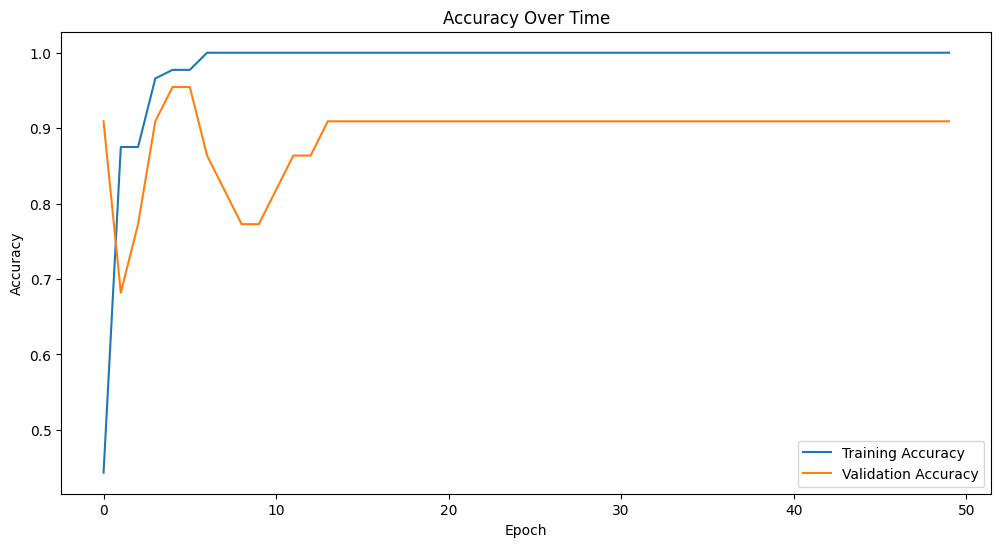

In [64]:
#Result
plt.figure(figsize=(12, 6))

plt.plot(range(epochs), history.history['accuracy'], label="Training Accuracy")
plt.plot(range(epochs), history.history['val_accuracy'], label="Validation Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title("Accuracy Over Time")

plt.show()

In [65]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.4302 - accuracy: 0.8333 - auc: 0.9296


[0.43024125695228577, 0.8333333134651184, 0.9295652508735657]

In [66]:
X.shape

(158, 59)

In [67]:
ynew = model.predict(X)
ynew.shape

5/5 [==============================] - 0s 2ms/step


(158, 1)

In [68]:
for i in range(data.shape[0]):
    print("X=%s, Predicted=%s" % (X[i], ynew[i]))

X=[-0.92906044 -0.60172167  0.22065873 -0.11853398  0.77100999  1.51578754
  0.48007914 -1.22904769  0.72823653  0.13670441 -0.41983435 -0.41319094
 -0.82634619 -0.4630932   0.78979593  0.68700116 -0.39151586 -0.56273143
  0.77198419 -0.43355498  0.77198419 -0.52363494  1.16542222 -0.59196905
 -0.68041382 -0.21530819 -0.16116459 -0.16116459 -0.07980869 -0.07980869
 -0.25993762 -0.13912167 -0.1132277  -0.16116459 -0.07980869 -0.21530819
 -0.07980869 -0.4940592   1.7175564  -0.07980869 -0.45398995 -0.16116459
 -0.1132277  -0.23094011 -0.55297841 -0.68041382  1.10695624 -0.21530819
  0.39151586 -0.31180478 -0.35856858  0.96271972 -0.76157731 -0.52363494
  1.06542721 -0.68041382 -0.71046598 -0.50395263  1.07906606], Predicted=[0.99857813]
X=[ 0.97732332 -0.60172167  0.22065873 -0.11853398 -1.82089593 -0.72247818
 -1.16888835  1.05553508  0.72823653  0.13670441 -0.41983435 -0.41319094
 -0.82634619 -0.4630932   0.78979593  0.68700116 -0.39151586  1.77704663
 -1.29536331 -0.43355498 -1.295363

In [69]:
for i in range(6):
    if((ynew[i])>0.5):
        print('Depressed')
    else:
        print('Happy')

Depressed
Depressed
Happy
Depressed
Happy
Depressed


In [70]:
predicted=[]
for i in range(data.shape[0]):
    if ynew[i]>0.5:
        predicted.append(1)
    else:
        predicted.append(0)

In [71]:
#test_labels=[1,0,1,0,1,0]
test_labels=y
cm = confusion_matrix(y_true=test_labels, y_pred=predicted)

In [72]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [73]:
cm_plot_labels = ['Depressed','Happy']

Confusion matrix, without normalization
[[70  7]
 [ 3 78]]


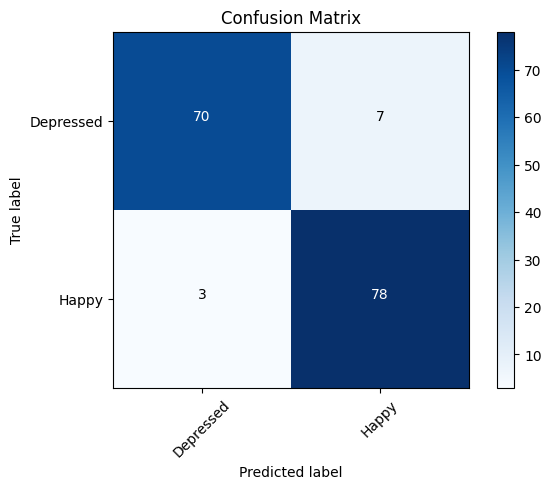

In [74]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [75]:
Xnew=[[1,0,1,0,2,0,5,3,3,0,0,1,5.0,0,5.0,5.0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0],[0,1,1,1,0,1,4,0,1,1,0,1,1.0,1,3.0,3.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0],[0,0,2,2,2,1,2,2,3,3,0,2,2.0,3,4.0,2.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1],[1,0,0,0,2,2,5,1,1,1,0,1,3.0,1,1.0,5.0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0],[0,0,1,1,2,3,4,0,2,2,0,1,1.0,1,4.0,5.0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1],[1,0,1,2,2,0,2,2,3,0,0,3,1.0,1,2.0,5.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1]]
Xnew = scaler.transform(Xnew)

/Users/dhruvsaluja/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [76]:
#ynew = model.predict(Xnew)
Xnew.shape

(6, 59)

In [77]:
data.shape[0]

158

In [78]:
ynew = model.predict(Xnew)

1/1 [==============================] - 0s 14ms/step


In [79]:
ynew

array([[1.7904270e-01],
       [2.0168263e-04],
       [9.9998689e-01],
       [1.4632326e-02],
       [9.9857813e-01],
       [8.6728698e-03]], dtype=float32)

In [80]:
Xnew = [[1,0,1,0,2,0,5,3,3,0,0,1,5.0,0,5.0,5.0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0]]

In [81]:
ynew = model.predict(Xnew)

1/1 [==============================] - 0s 28ms/step


In [82]:
ynew

array([[1.]], dtype=float32)

In [83]:
X.shape

(158, 59)

In [84]:
Xnew = X[7]

In [85]:
Xnew

array([-0.92906044, -0.60172167,  1.34530648, -0.11853398, -0.52494297,
        0.39665468, -0.3444046 , -0.08675631,  0.72823653,  0.13670441,
       -0.41983435,  0.71239818, -0.82634619,  1.54152941,  0.03806245,
        0.68700116,  2.55417492, -0.56273143, -1.29536331, -0.43355498,
       -1.29536331,  1.90972742, -0.85805812, -0.59196905,  1.46969385,
       -0.21530819, -0.16116459, -0.16116459, -0.07980869, -0.07980869,
       -0.25993762, -0.13912167, -0.1132277 , -0.16116459, -0.07980869,
       -0.21530819, -0.07980869, -0.4940592 ,  1.7175564 , -0.07980869,
       -0.45398995, -0.16116459, -0.1132277 , -0.23094011,  1.80838886,
       -0.68041382, -0.90337808, -0.21530819,  0.39151586, -0.31180478,
       -0.35856858, -1.03872391,  1.31306433,  1.90972742, -0.93859064,
       -0.68041382, -0.71046598,  1.98431348, -0.92672732])

In [86]:
ynew = model.predict(np.array(Xnew,ndmin=2))

1/1 [==============================] - 0s 18ms/step


In [87]:
def health(x):
    ynew = model.predict(np.array(Xnew,ndmin=2))
    if(ynew<0.5):
        print("depressed")
    else:
        print("happy")
            

In [88]:
health(Xnew)

1/1 [==============================] - 0s 15ms/step
depressed
